### Customer Personalised Impact Report 

To show each customer
- **P E R F O R M A N C E D A S H B O A R D**
    - Completion rate and streak of meeting target
    - Over Time Trends of Quantity recycled(collected)
    - Environmental Impact
    

- **C O M M U N I T Y D A S H B O A R D**
    - Customer's Rating

In [1]:
#Import Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\LENOVO T460S\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\LENOVO T460S\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Data Preparation

In [2]:
# Load the Excel file to check the structure of the data
file_path = 'clean_waste_data_updated.xlsx'

# Load the excel file and display its sheet names
excel_data = pd.ExcelFile(file_path)

dataframes = pd.read_excel(file_path, sheet_name=None)

waste_owners_register = dataframes['waste_owners_register']
waste_collection_record = dataframes['waste_collection_record']
monthly_material_target = dataframes['monthly_material_target']

In [3]:
# Define the conditions for each material
conditions = [
    waste_collection_record['material_collected'] == "PET Plastic (water, soda, juices, etc)",
    waste_collection_record['material_collected'] == "Aluminum (can drinks)",
    waste_collection_record['material_collected'] == "Glass",
    waste_collection_record['material_collected'] == "PP Plastic (transparent take away packs)",
    waste_collection_record['material_collected'] == "Cardboard"
]

# Define the corresponding CO2_saved_kg multiplier for each material
multipliers = [1.5, 9, 0.3, 0.7, 0.9]

# Calculate CO2_saved_kg based on the conditions and multipliers
waste_collection_record['CO2_saved_kg'] = np.select(conditions, multipliers, default=0) * waste_collection_record['quantity_collected_kg']


In [4]:
# Define the conditions for each material
conditions = [
    waste_collection_record['material_collected'] == "PET Plastic (water, soda, juices, etc)",
    waste_collection_record['material_collected'] == "Aluminum (can drinks)",
    waste_collection_record['material_collected'] == "Glass",
    waste_collection_record['material_collected'] == "PP Plastic (transparent take away packs)",
    waste_collection_record['material_collected'] == "Cardboard"
]

# Define the corresponding CO2_saved_kg multiplier for each material
multipliers = [0.0015, 0.003, 0.0003, 0.0018, 0.0025]

# Calculate CO2_saved_kg based on the conditions and multipliers
waste_collection_record['land_fill_saved_m3'] = np.select(conditions, multipliers, default=0) * waste_collection_record['quantity_collected_kg']

- Create customer_rating column

In [5]:
# Create 'customer_rating' column based on 'customer_review' in the waste_collection_record DataFrame
waste_collection_record['customer_rating'] = waste_collection_record['customer_review'].map({
    'Poor': 1,
    'Fair': 2,
    'Average': 3,
    'Good': 4,
    'Excellent': 5
})


In [6]:
# Group by month and material_collected, summing the quantity_collected_kg
grouped_data = waste_collection_record.groupby(['customer_name', 'collection_month', 'material_collected'])['quantity_collected_kg'].sum().reset_index()
# Merging the DataFrames on the specified columns
merged_data = pd.merge(
    grouped_data,
    monthly_material_target,
    left_on=['material_collected', 'collection_month'],
    right_on=['waste_material', 'month'],
    how='left'  # Use 'left' to keep all records from grouped_data
)

# Calculate if the target was met
merged_data['target_met'] = merged_data['quantity_collected_kg'] >= merged_data['target_kg']

In [15]:
# Save the Clean data to an Excel file with different sheets
with pd.ExcelWriter('PIR_data.xlsx', engine='xlsxwriter') as writer:
    waste_owners_register.to_excel(writer, sheet_name='waste_owners_register', index=False)
    waste_collection_record.to_excel(writer, sheet_name='waste_collection_record', index=False)
    monthly_material_target.to_excel(writer, sheet_name='monthly_material_target', index=False)
    merged_data.to_excel(writer, sheet_name='merged_data', index=False)

print("Dataframes saved to Excel file!")

Dataframes saved to Excel file!


# Hopeland

In [7]:
# Filter the merged_data DataFrame to include only the rows where the customer name is "Hopeland"
# This creates a new DataFrame containing only data related to the customer "Hopeland"
merged_data_hopeland = merged_data[merged_data["customer_name"] == "Hopeland"]


In [8]:
print(merged_data_hopeland.shape)
merged_data_hopeland

(15, 9)


,customer_name,collection_month,material_collected,quantity_collected_kg,material_ID,waste_material,month,target_kg,target_met
45,Hopeland,November,Aluminum (can drinks),746,MAT_002,Aluminum (can drinks),November,1063.9125,False
46,Hopeland,November,Cardboard,446,MAT_005,Cardboard,November,969.0975,False
47,Hopeland,November,Glass,753,MAT_003,Glass,November,1009.8900,False
48,Hopeland,November,"PET Plastic (water, soda, juices, etc)",812,MAT_001,"PET Plastic (water, soda, juices, etc)",November,1048.4775,False
49,Hopeland,November,PP Plastic (transparent take away packs),798,MAT_004,PP Plastic (transparent take away packs),November,981.2250,False
50,Hopeland,October,Aluminum (can drinks),882,MAT_002,Aluminum (can drinks),October,1013.2500,False
51,Hopeland,October,Cardboard,968,MAT_005,Cardboard,October,922.9500,True
52,Hopeland,October,Glass,505,MAT_003,Glass,October,961.8000,False
53,Hopeland,October,"PET Plastic (water, soda, juices, etc)",501,MAT_001,"PET Plastic (water, soda, juices, etc)",October,998.5500,False
54,Hopeland,October,PP Plastic (transparent take away packs),722,MAT_004,PP Plastic (transparent take away packs),October,934.5000,False


- ###### Monthly completion Streak. ie How often Hopeland meets the monthly target

In [9]:
# Group the filtered data (for Hopeland) by 'collection_month' and calculate aggregate values
hopeland_summary = merged_data_hopeland.groupby('collection_month').agg({
    # Sum the total quantity collected per month
    'quantity_collected_kg': 'sum',
    # Sum the total target for each month
    'target_kg': 'sum',
    # Check if the target was met for all records within the month (True if all are met, False otherwise)
    'target_met': 'all'
}).reset_index()  # Reset the index to convert the result back into a DataFrame

# Calculate the percentage of the target met each month, rounded to two decimal places
hopeland_summary['percentage_to_target'] = (
    hopeland_summary['quantity_collected_kg'] / hopeland_summary['target_kg'] * 100
).round(2)

# Display the summary DataFrame for Hopeland
hopeland_summary

,collection_month,quantity_collected_kg,target_kg,target_met,percentage_to_target
0,November,3555,5072.6025,False,70.08
1,October,3578,4831.0500,False,74.06
2,September,4759,4601.0000,False,103.43


In [10]:
# Initialize streak counter to 0
streak = 0

# Loop through the 'target_met' column in reverse order to calculate the current streak
for met in hopeland_summary['target_met'][::-1]:
    if met:  # If the target was met in a given month
        streak += 1  # Increase the streak count
    else:  # If the target was not met, break the loop (streak ends)
        break

# Print the result: the number of consecutive months where the target was met
print(f"Current Monthly Completion Streak: {streak} month(s)")


Current Monthly Completion Streak: 0 month(s)


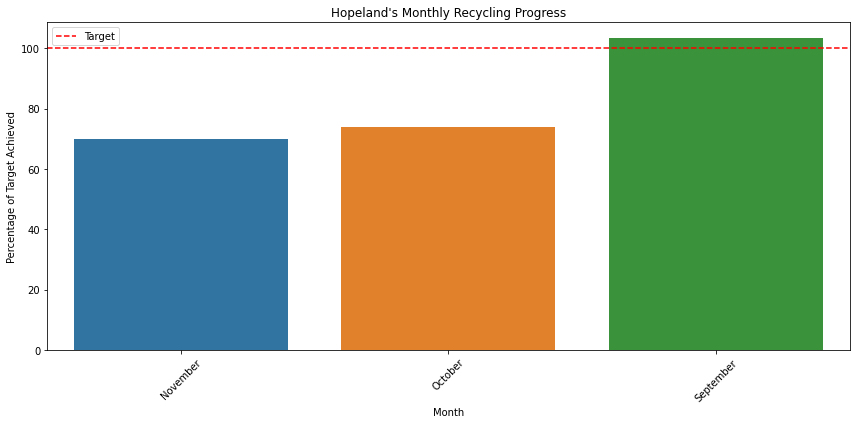

In [11]:
# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='collection_month', y='percentage_to_target', data=hopeland_summary)
plt.title("Hopeland's Monthly Recycling Progress")
plt.xlabel("Month")
plt.ylabel("Percentage of Target Achieved")
plt.axhline(y=100, color='r', linestyle='--', label='Target')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
# Calculate overall percentage to target
overall_percentage = (hopeland_summary['quantity_collected_kg'].sum() / hopeland_summary['target_kg'].sum() * 100).round(2)
print(f"\
Overall percentage to target: {overall_percentage}%")

Overall percentage to target: 81.99%


- ###### Over Time Trends of Quantity recycled(collected) For Hopeland

In [14]:
# Filter data for Hopeland
hopeland_waste_data = waste_collection_record[waste_collection_record['customer_name'] == 'Hopeland']

In [15]:
# Aggregate data by month and material
material_trend = hopeland_waste_data.groupby(['collection_month', 'material_collected']).agg({
    'quantity_collected_kg': 'sum'
}).reset_index()
material_trend

,collection_month,material_collected,quantity_collected_kg
0,November,Aluminum (can drinks),746
1,November,Cardboard,446
2,November,Glass,753
3,November,"PET Plastic (water, soda, juices, etc)",812
4,November,PP Plastic (transparent take away packs),798
5,October,Aluminum (can drinks),882
6,October,Cardboard,968
7,October,Glass,505
8,October,"PET Plastic (water, soda, juices, etc)",501
9,October,PP Plastic (transparent take away packs),722


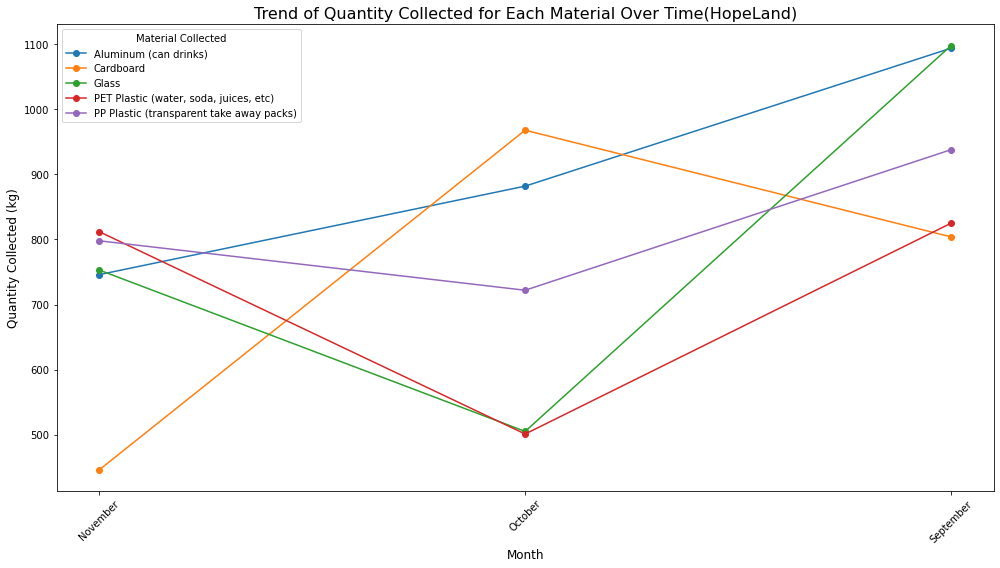

In [17]:
import matplotlib.pyplot as plt

# Get the unique materials to plot each material separately
materials = material_trend['material_collected'].unique()

# Create the figure and axis
plt.figure(figsize=(14, 8))

# Loop through each material and plot the trend
for material in materials:
    material_data = material_trend[material_trend['material_collected'] == material]
    plt.plot(material_data['collection_month'], material_data['quantity_collected_kg'], marker='o', label=material)

# Add title and labels
plt.title("Trend of Quantity Collected for Each Material Over Time(HopeLand)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Quantity Collected (kg)", fontsize=12)

# Rotate x-ticks for readability
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Material Collected')

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()


In [18]:
# Aggregate total quantity collected by month
total_trend = hopeland_waste_data.groupby('collection_month').agg({
    'quantity_collected_kg': 'sum'
}).reset_index()

total_trend

,collection_month,quantity_collected_kg
0,November,3555
1,October,3578
2,September,4759


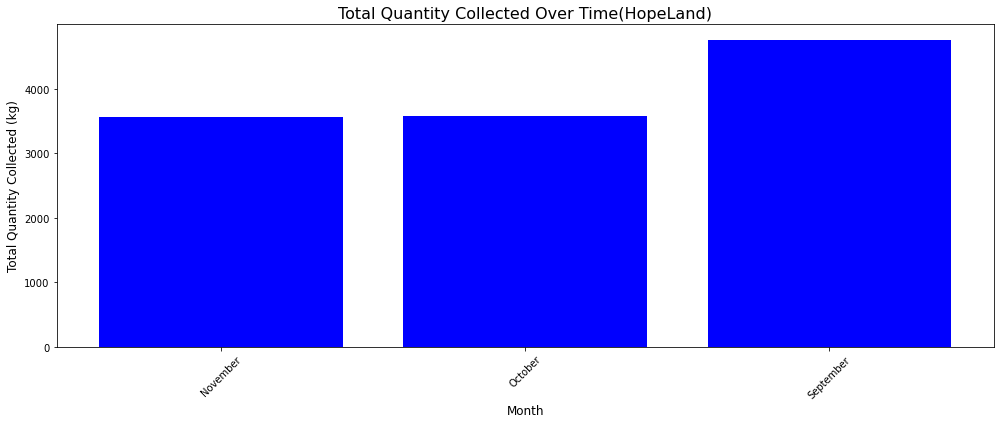

In [19]:
import matplotlib.pyplot as plt

# Create the figure and axis
plt.figure(figsize=(14, 6))

# Create a bar plot for the total quantity collected
plt.bar(total_trend['collection_month'], total_trend['quantity_collected_kg'], color='b')

# Add title and labels
plt.title("Total Quantity Collected Over Time(HopeLand)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Quantity Collected (kg)", fontsize=12)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()


- ###### Enovironmental Impact

In [20]:
# Aggregate CO2 saved by material
co2_saved_summary = hopeland_waste_data.groupby('material_collected').agg({
    'CO2_saved_kg': 'sum'
}).reset_index()

# Calculate percentage of total CO2 saved
total_co2_saved = co2_saved_summary['CO2_saved_kg'].sum()
co2_saved_summary['percentage'] = (co2_saved_summary['CO2_saved_kg'] / total_co2_saved * 100).round(2)

print("CO2 Saved Summary:")
print(co2_saved_summary)

CO2 Saved Summary:
                         material_collected  CO2_saved_kg  percentage
0                     Aluminum (can drinks)       24498.0       76.25
1                                 Cardboard        1996.2        6.21
2                                     Glass         706.8        2.20
3    PET Plastic (water, soda, juices, etc)        3207.0        9.98
4  PP Plastic (transparent take away packs)        1720.6        5.36


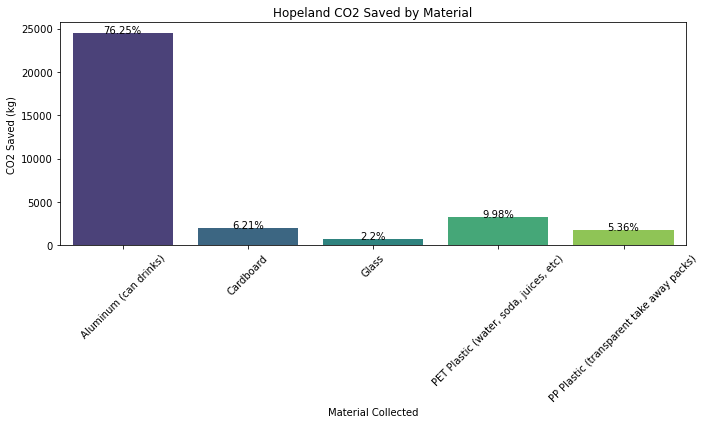

In [21]:
# Visualize the CO2 saved
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='material_collected', y='CO2_saved_kg', data=co2_saved_summary, palette='viridis')

# Add percentage labels
for index, row in co2_saved_summary.iterrows():
    barplot.text(index, row['CO2_saved_kg'], str(row['percentage']) + '%', color='black', ha="center")

plt.title("Hopeland CO2 Saved by Material")
plt.xlabel("Material Collected")
plt.ylabel("CO2 Saved (kg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- ###### Custmer's Rating

In [23]:
# Calculate the average customer rating for Hopeland
hopeland_ratings = hopeland_waste_data['customer_rating']
average_rating = hopeland_ratings.sum() / hopeland_ratings.count()

print("Average Customer Rating for Hopeland:", average_rating)

Average Customer Rating for Hopeland: 2.8615384615384616


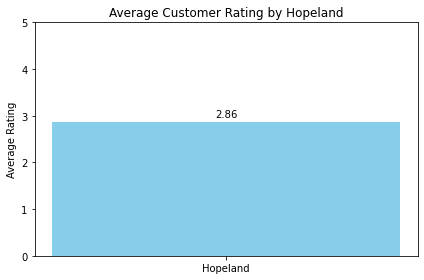

In [24]:
# Visualize the average rating
plt.figure(figsize=(6, 4))
plt.bar(['Hopeland'], [average_rating], color='skyblue')
plt.title("Average Customer Rating by Hopeland")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.text(0, average_rating + 0.1, f'{average_rating:.2f}', ha='center')
plt.tight_layout()
plt.show()

###### Since it will be the same process for all other customer, I structured the whole Code process in to Function

Data for Playhouse:
(15, 9)
Playhouse Summary:
  collection_month  quantity_collected_kg  target_kg  target_met  \
0         November                   3656  5072.6025       False   
1          October                   3687  4831.0500       False   
2        September                   4689  4601.0000       False   

   percentage_to_target  
0                 72.07  
1                 76.32  
2                101.91  
Current Monthly Completion Streak for Playhouse: 0 month(s)


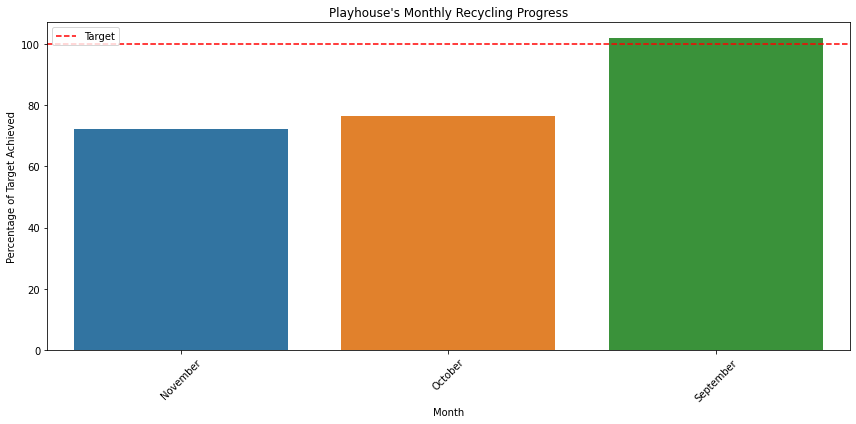

Overall percentage to target for Playhouse: 82.95%


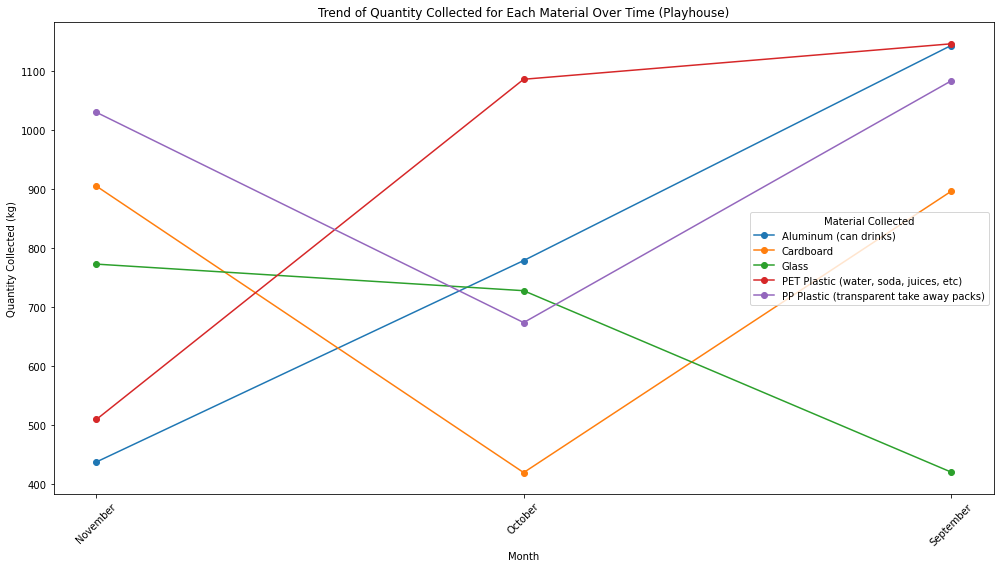

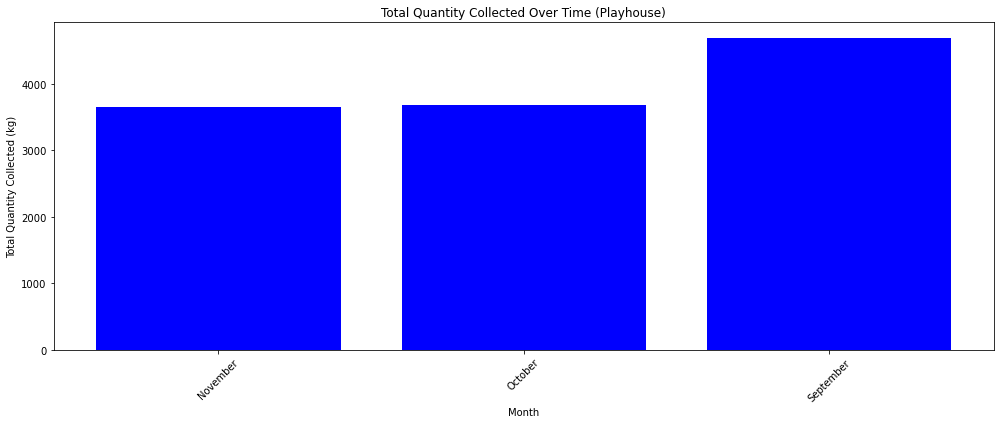

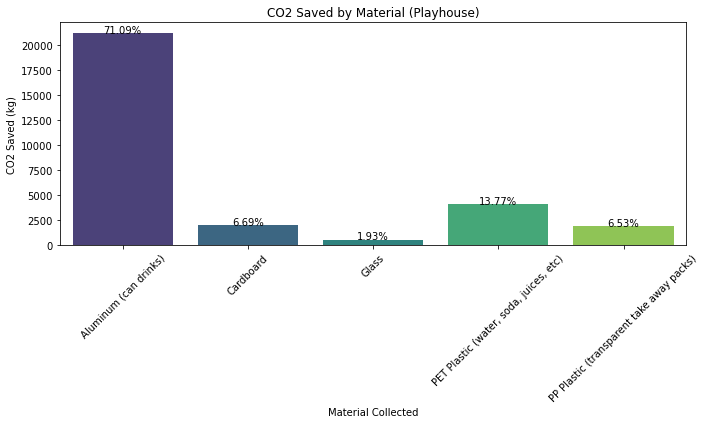

Average Customer Rating for Playhouse: 2.95


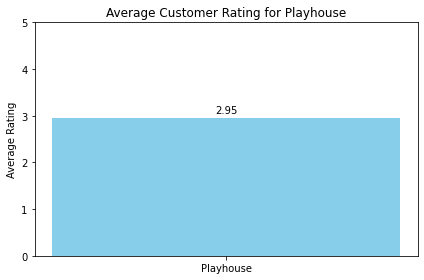

Data for Nemesis:
(15, 9)
Nemesis Summary:
  collection_month  quantity_collected_kg  target_kg  target_met  \
0         November                   6213  5072.6025       False   
1          October                   5573  4831.0500       False   
2        September                   7866  4601.0000        True   

   percentage_to_target  
0                122.48  
1                115.36  
2                170.96  
Current Monthly Completion Streak for Nemesis: 1 month(s)


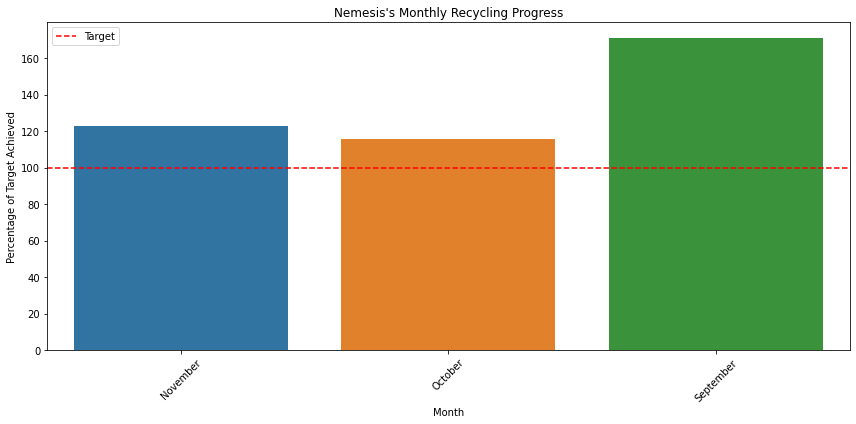

Overall percentage to target for Nemesis: 135.49%


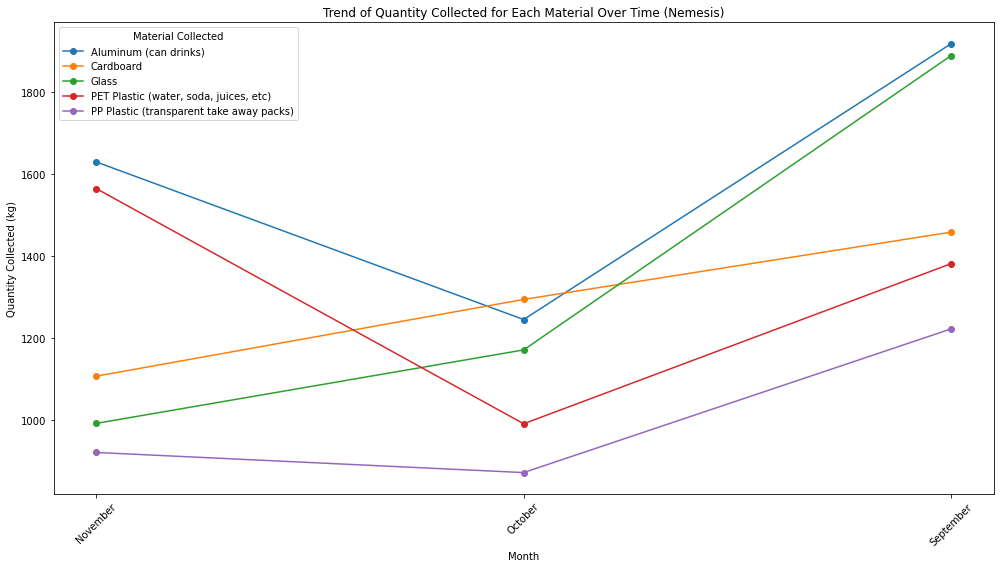

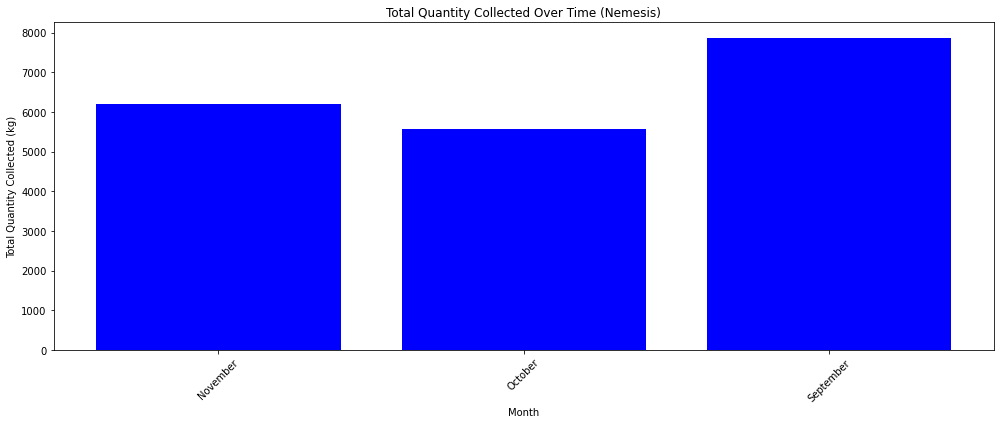

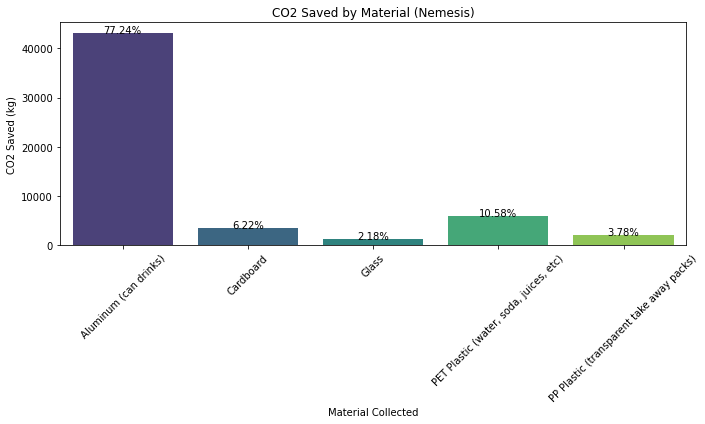

Average Customer Rating for Nemesis: 3.03


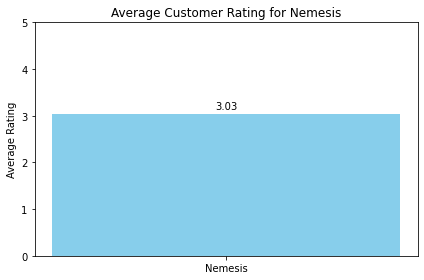

Data for Wingside:
(15, 9)
Wingside Summary:
  collection_month  quantity_collected_kg  target_kg  target_met  \
0         November                   1957  5072.6025       False   
1          October                   2646  4831.0500       False   
2        September                   3558  4601.0000       False   

   percentage_to_target  
0                 38.58  
1                 54.77  
2                 77.33  
Current Monthly Completion Streak for Wingside: 0 month(s)


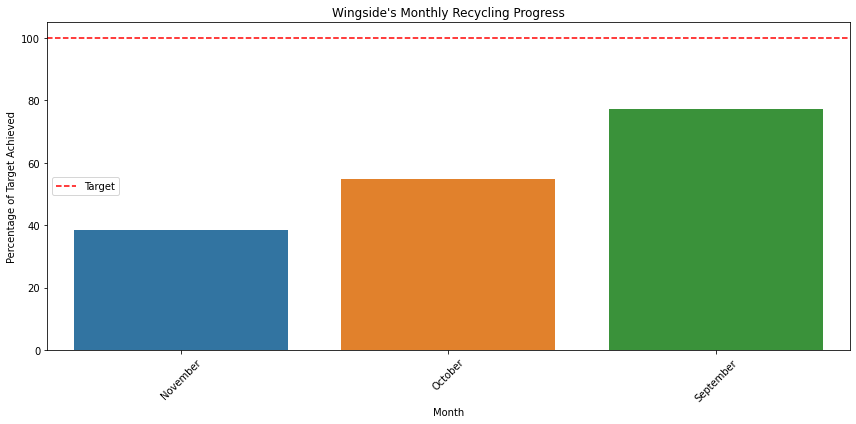

Overall percentage to target for Wingside: 56.26%


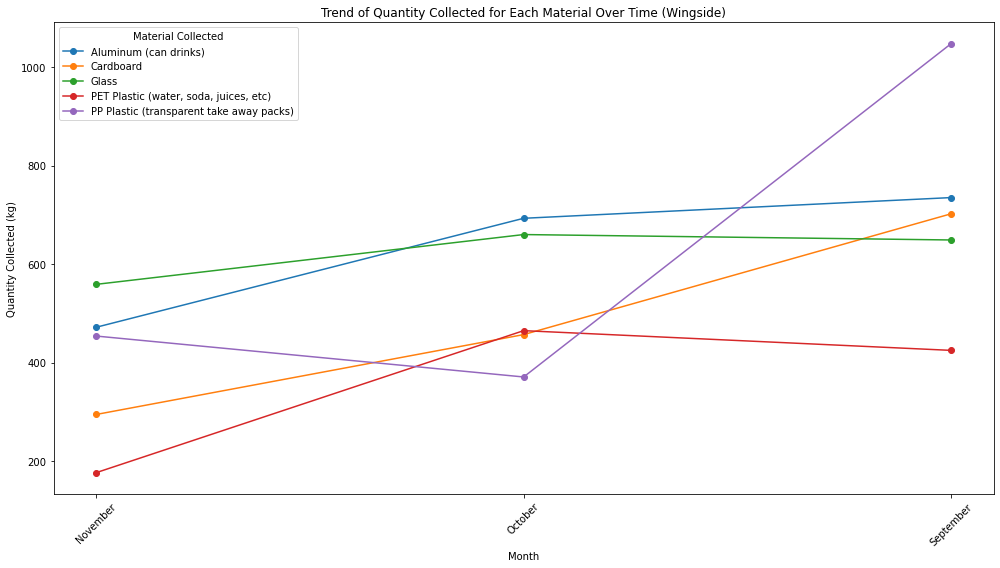

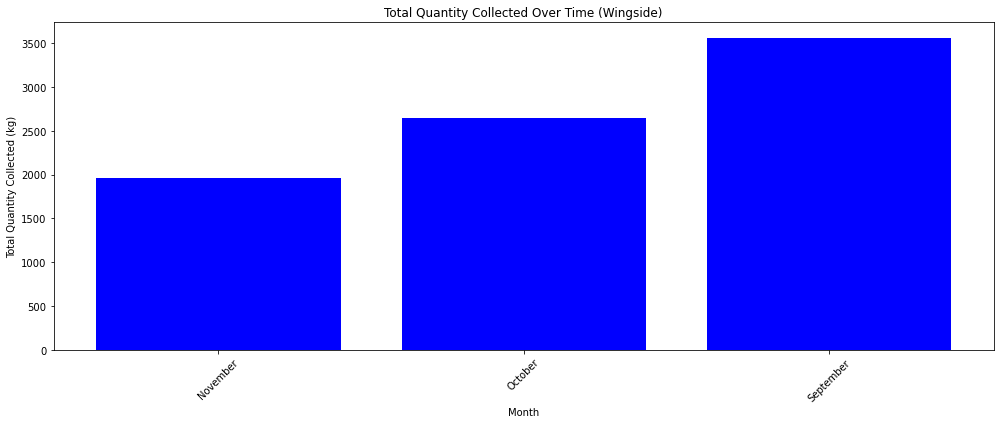

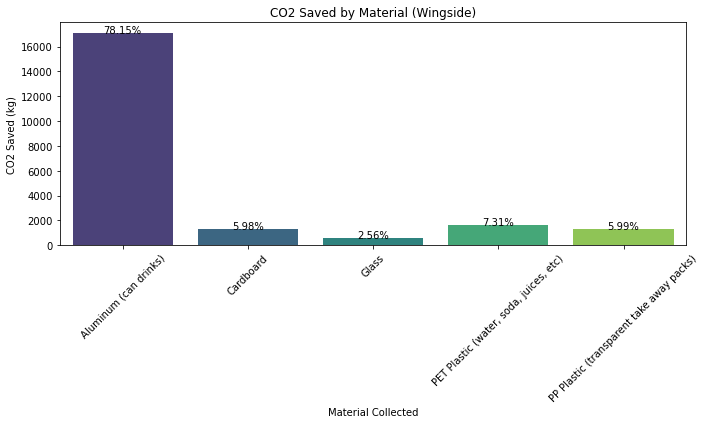

Average Customer Rating for Wingside: 2.74


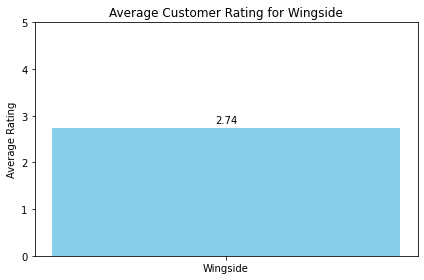

Data for D’mix:
(15, 9)
D’mix Summary:
  collection_month  quantity_collected_kg  target_kg  target_met  \
0         November                   4776  5072.6025       False   
1          October                   4957  4831.0500       False   
2        September                   7044  4601.0000        True   

   percentage_to_target  
0                 94.15  
1                102.61  
2                153.10  
Current Monthly Completion Streak for D’mix: 1 month(s)


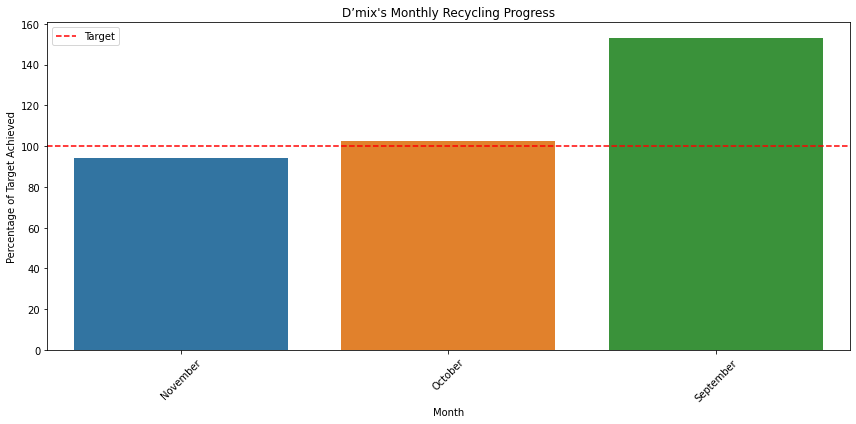

Overall percentage to target for D’mix: 115.67%


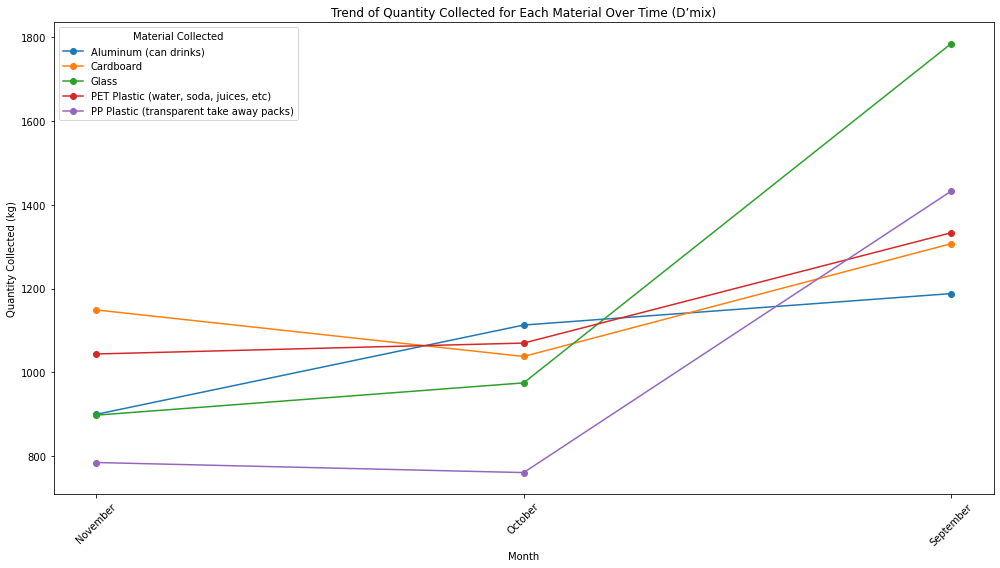

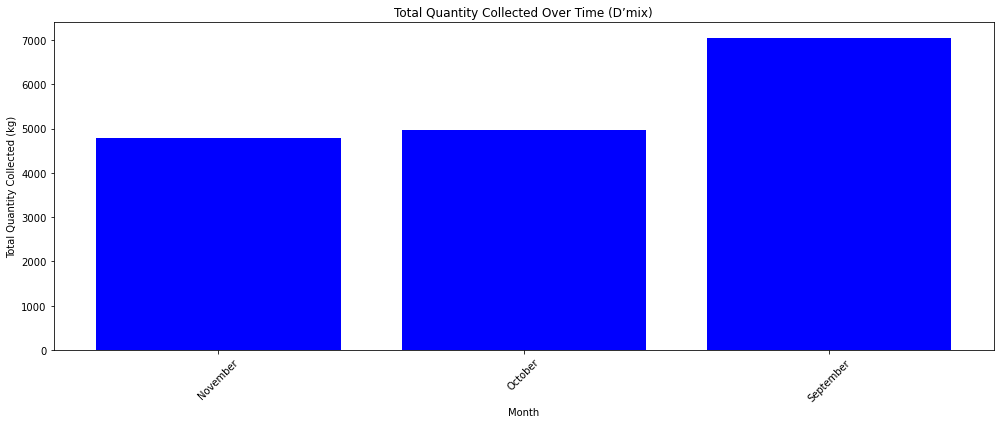

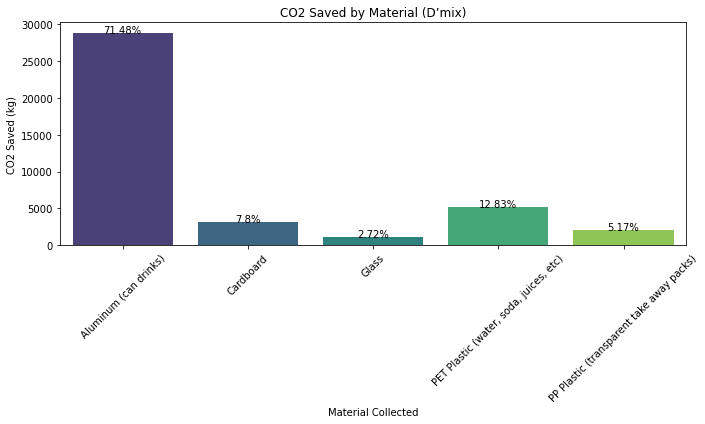

Average Customer Rating for D’mix: 2.83


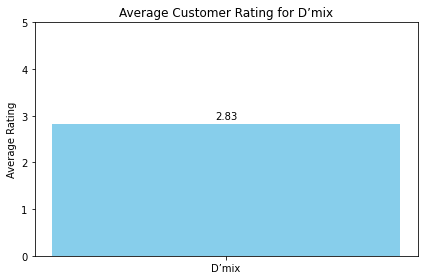

Data for Amala joint:
(15, 9)
Amala joint Summary:
  collection_month  quantity_collected_kg  target_kg  target_met  \
0         November                   5103  5072.6025       False   
1          October                   4919  4831.0500       False   
2        September                   6712  4601.0000       False   

   percentage_to_target  
0                100.60  
1                101.82  
2                145.88  
Current Monthly Completion Streak for Amala joint: 0 month(s)


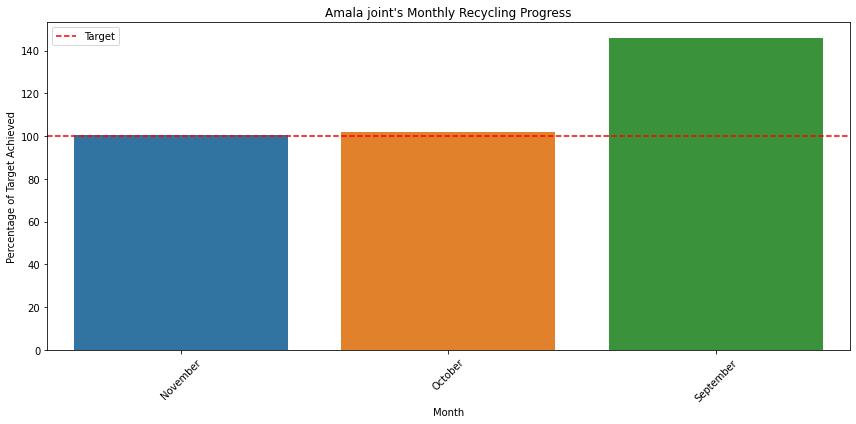

Overall percentage to target for Amala joint: 115.37%


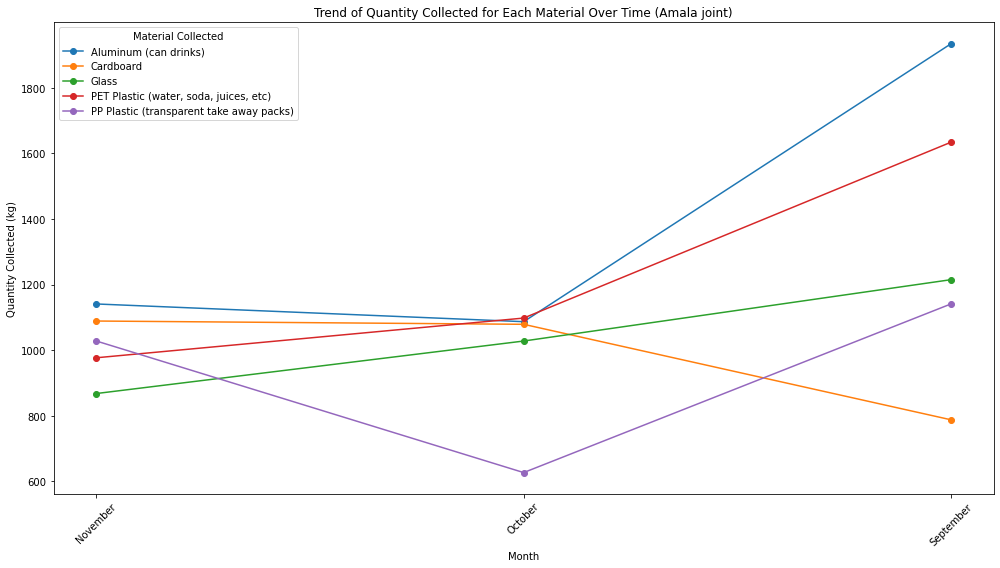

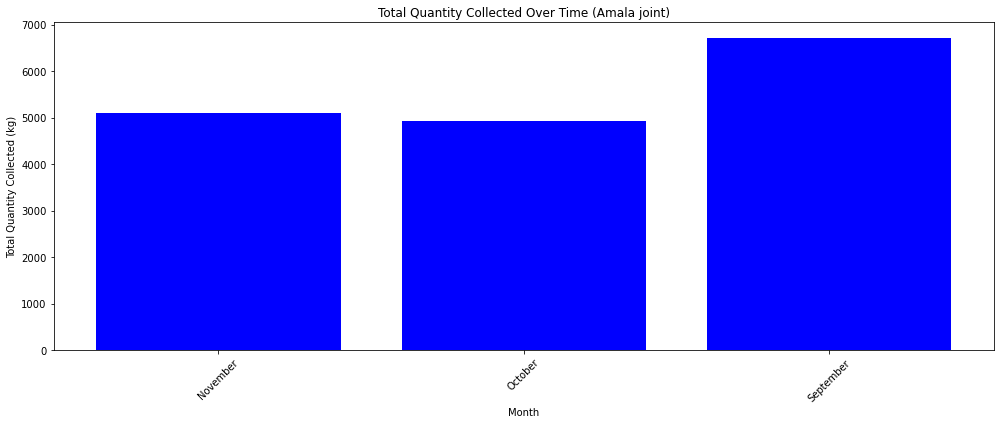

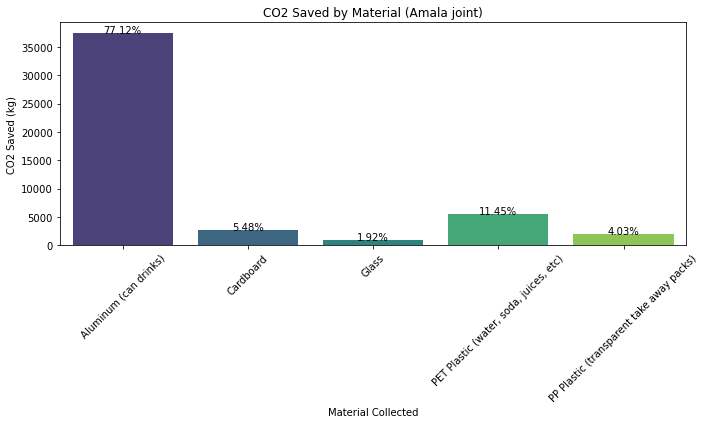

Average Customer Rating for Amala joint: 2.89


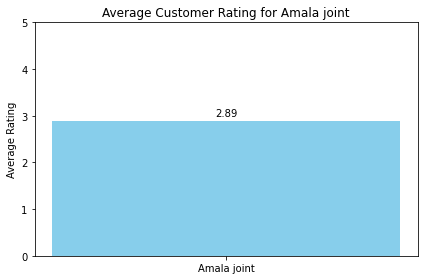

Data for Vineyard:
(15, 9)
Vineyard Summary:
  collection_month  quantity_collected_kg  target_kg  target_met  \
0         November                   5012  5072.6025       False   
1          October                   5143  4831.0500       False   
2        September                   6745  4601.0000        True   

   percentage_to_target  
0                 98.81  
1                106.46  
2                146.60  
Current Monthly Completion Streak for Vineyard: 1 month(s)


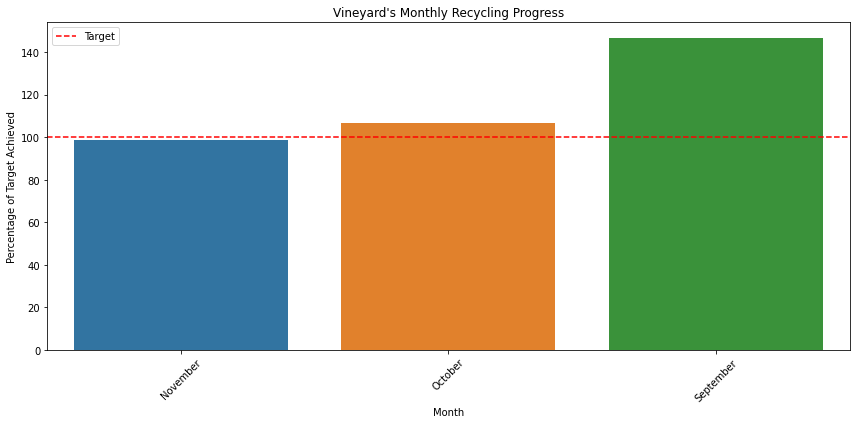

Overall percentage to target for Vineyard: 116.51%


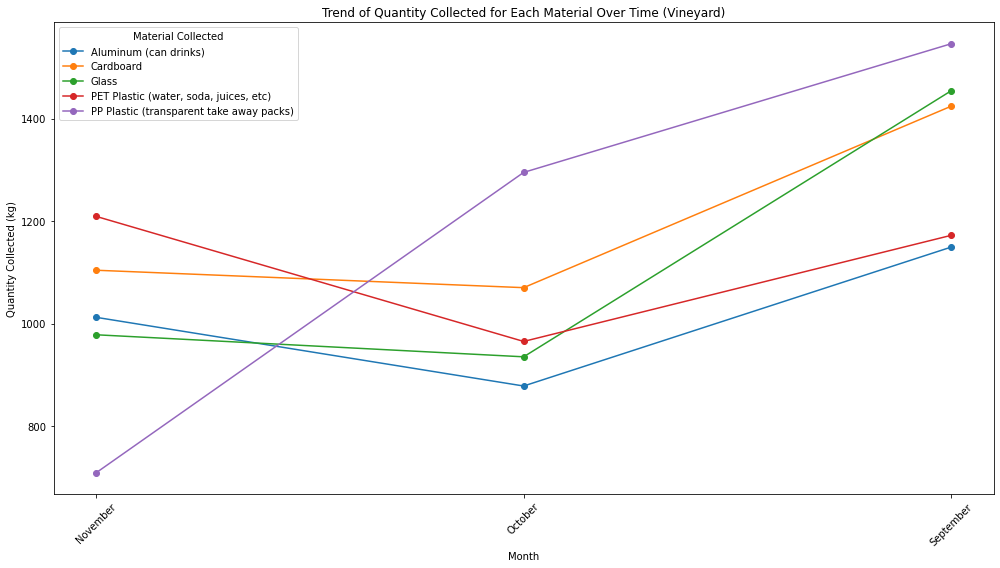

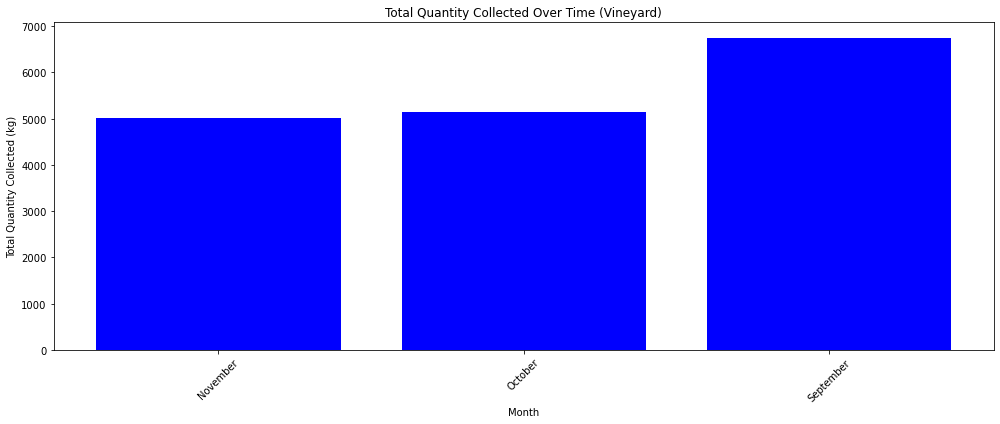

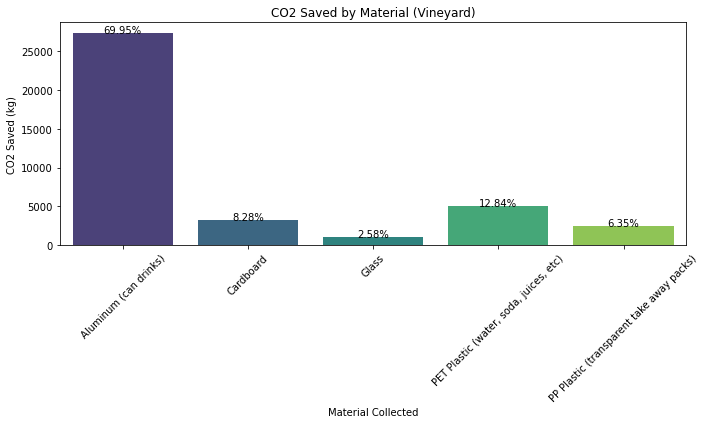

Average Customer Rating for Vineyard: 3.11


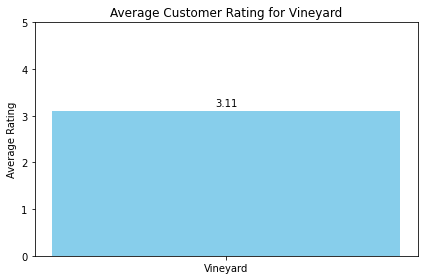

Data for Embassy lounge:
(15, 9)
Embassy lounge Summary:
  collection_month  quantity_collected_kg  target_kg  target_met  \
0         November                   3156  5072.6025       False   
1          October                   3300  4831.0500       False   
2        September                   4357  4601.0000       False   

   percentage_to_target  
0                 62.22  
1                 68.31  
2                 94.70  
Current Monthly Completion Streak for Embassy lounge: 0 month(s)


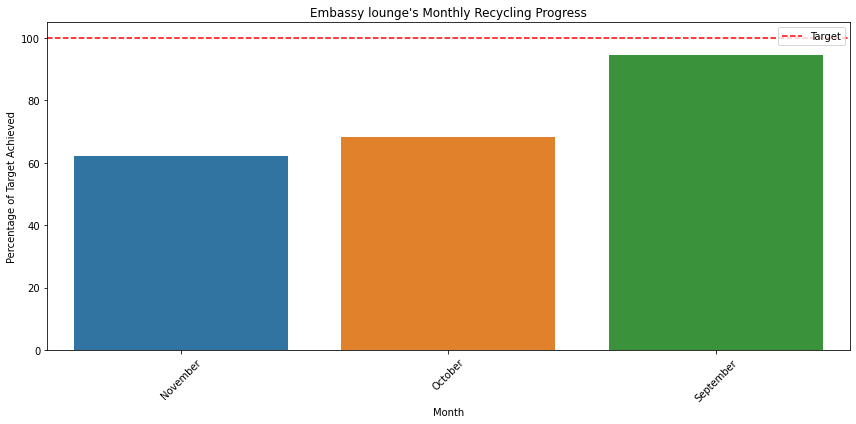

Overall percentage to target for Embassy lounge: 74.55%


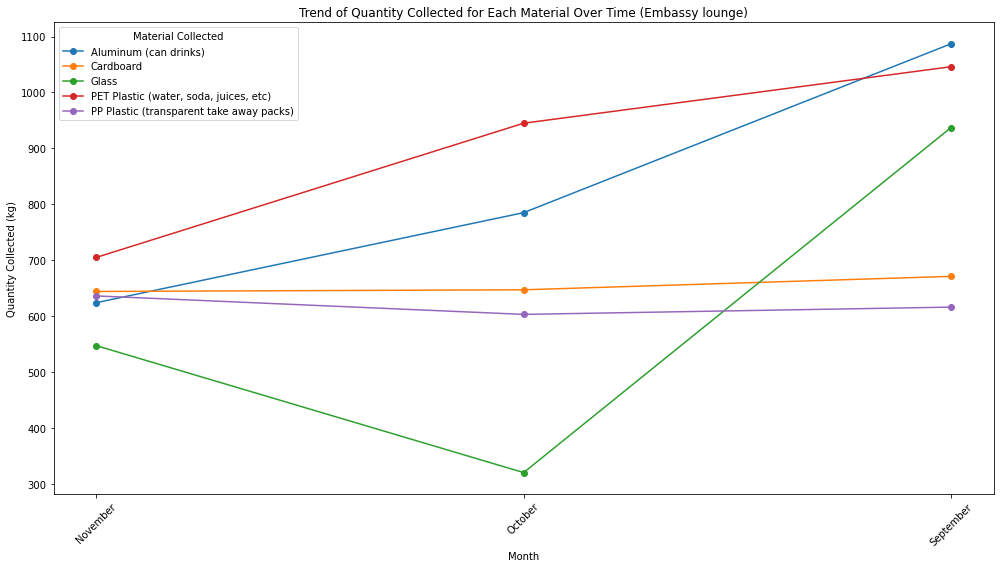

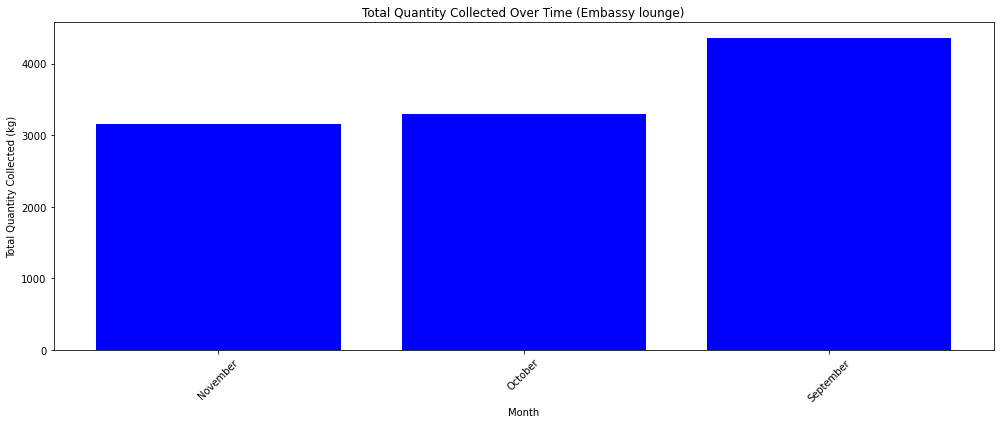

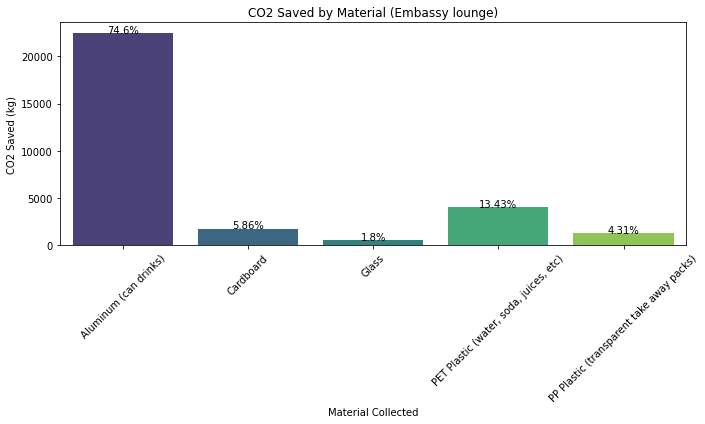

Average Customer Rating for Embassy lounge: 3.05


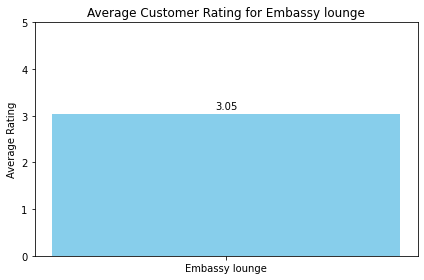

Data for Masaratti:
(15, 9)
Masaratti Summary:
  collection_month  quantity_collected_kg  target_kg  target_met  \
0         November                   2087  5072.6025       False   
1          October                   2051  4831.0500       False   
2        September                   2638  4601.0000       False   

   percentage_to_target  
0                 41.14  
1                 42.45  
2                 57.34  
Current Monthly Completion Streak for Masaratti: 0 month(s)


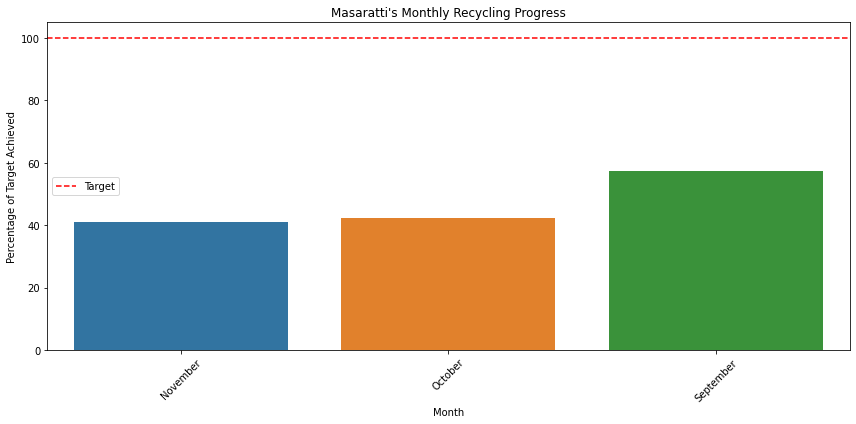

Overall percentage to target for Masaratti: 46.72%


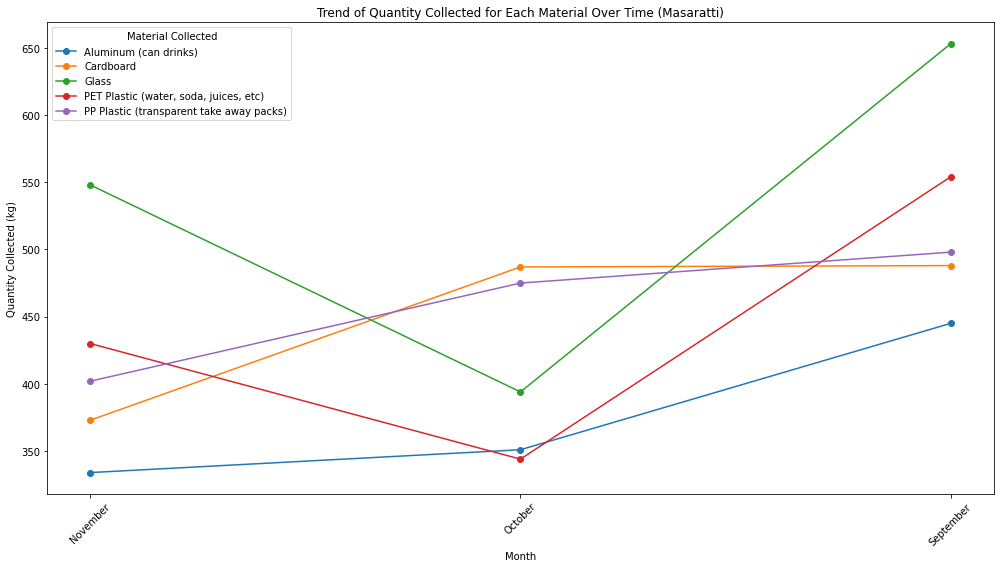

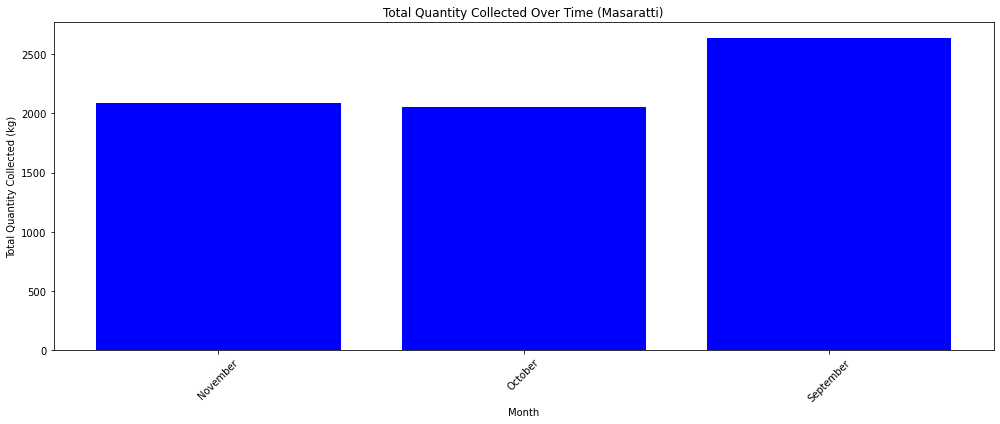

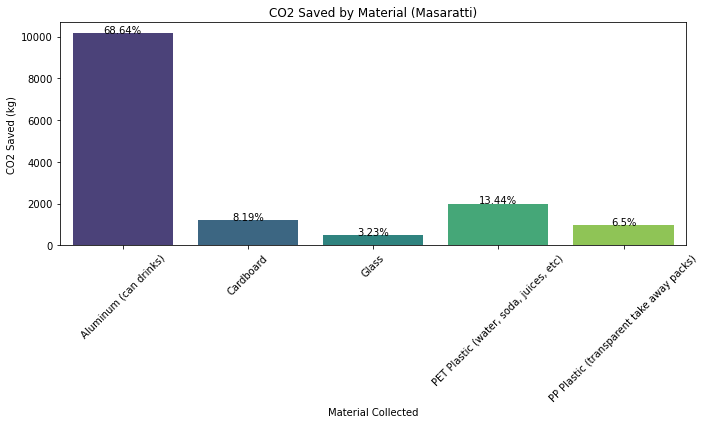

Average Customer Rating for Masaratti: 3.02


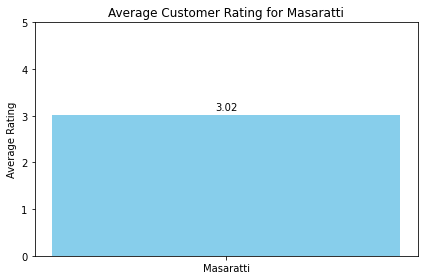

Data for Maximus:
(15, 9)
Maximus Summary:
  collection_month  quantity_collected_kg  target_kg  target_met  \
0         November                   6294  5072.6025       False   
1          October                   5546  4831.0500       False   
2        September                   6475  4601.0000        True   

   percentage_to_target  
0                124.08  
1                114.80  
2                140.73  
Current Monthly Completion Streak for Maximus: 1 month(s)


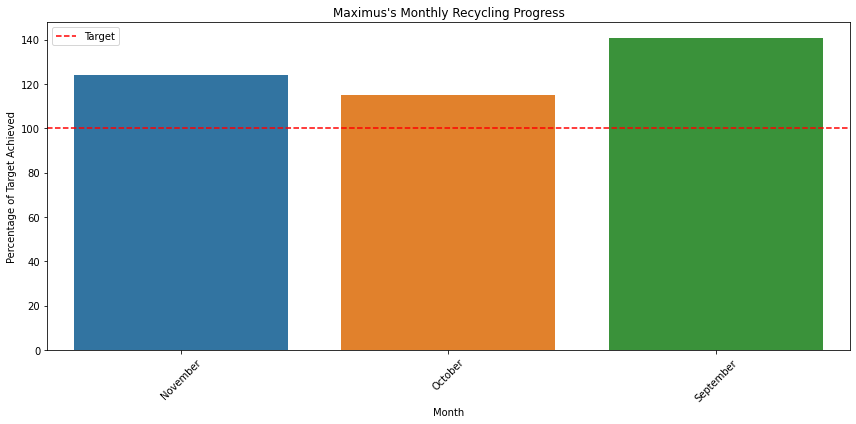

Overall percentage to target for Maximus: 126.27%


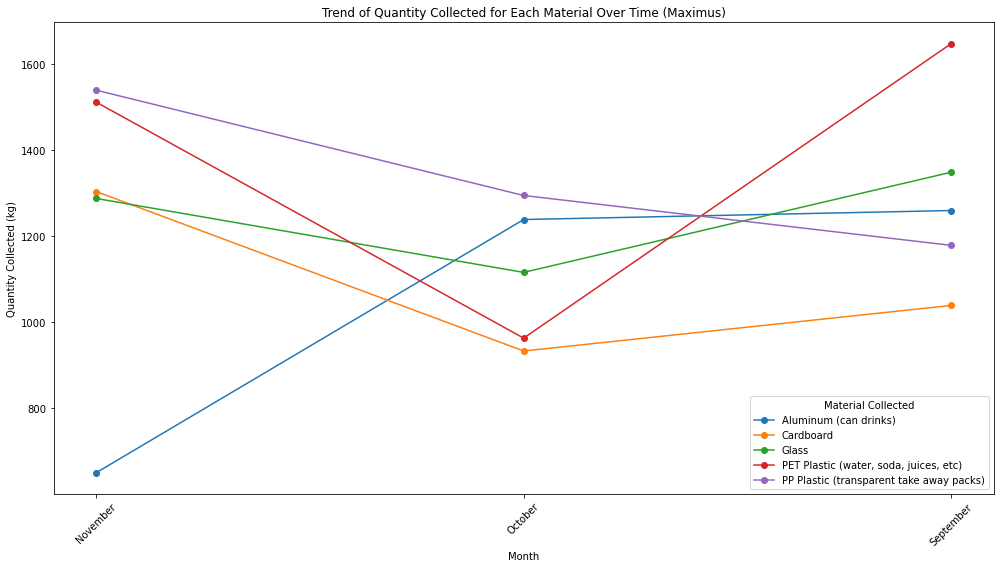

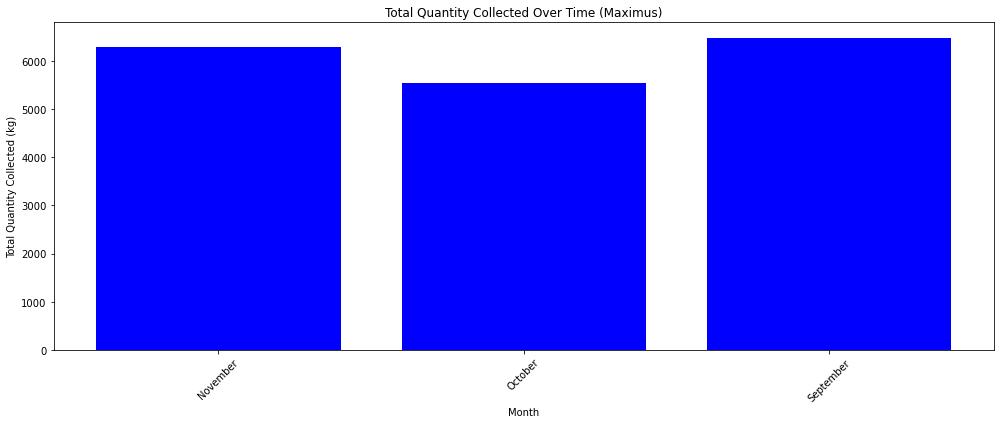

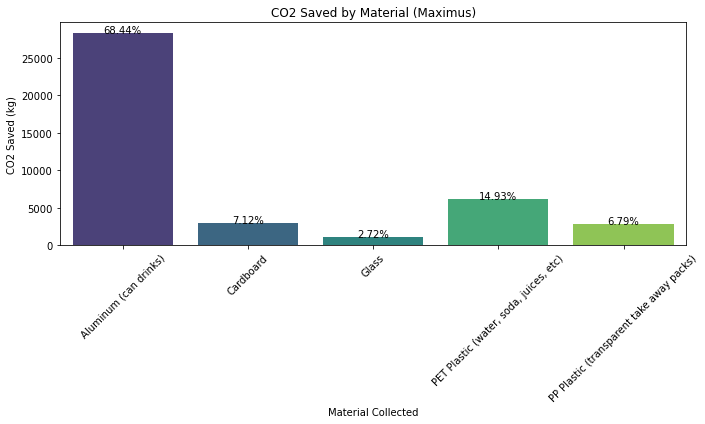

Average Customer Rating for Maximus: 2.95


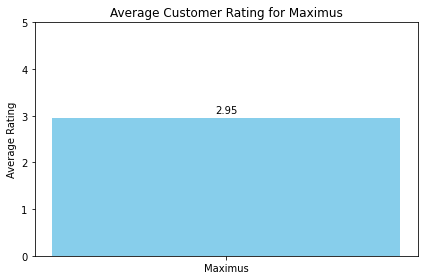

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_customer_data(merged_data, waste_collection_record, customer_name):
    # Filter data for the specific customer
    customer_data = merged_data[merged_data["customer_name"] == customer_name]
    
    print(f"Data for {customer_name}:")
    print(customer_data.shape)
    
    # Calculate monthly completion streak and percentage to target
    customer_summary = customer_data.groupby('collection_month').agg({
        'quantity_collected_kg': 'sum',
        'target_kg': 'sum',
        'target_met': 'all'
    }).reset_index()

    customer_summary['percentage_to_target'] = (
        customer_summary['quantity_collected_kg'] / customer_summary['target_kg'] * 100).round(2)
    
    print(f"{customer_name} Summary:")
    print(customer_summary)

    # Calculate the streak
    streak = 0
    for met in customer_summary['target_met'][::-1]:
        if met:
            streak += 1
        else:
            break
    print(f"Current Monthly Completion Streak for {customer_name}: {streak} month(s)")

    # Visualize the results
    plt.figure(figsize=(12, 6))
    sns.barplot(x='collection_month', y='percentage_to_target', data=customer_summary)
    plt.title(f"{customer_name}'s Monthly Recycling Progress")
    plt.xlabel("Month")
    plt.ylabel("Percentage of Target Achieved")
    plt.axhline(y=100, color='r', linestyle='--', label='Target')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Overall percentage to target
    overall_percentage = (customer_summary['quantity_collected_kg'].sum() / customer_summary['target_kg'].sum() * 100).round(2)
    print(f"Overall percentage to target for {customer_name}: {overall_percentage}%")

    # Waste collection data for the customer
    customer_waste_data = waste_collection_record[waste_collection_record['customer_name'] == customer_name]

    # Aggregate data by month and material
    material_trend = customer_waste_data.groupby(['collection_month', 'material_collected']).agg({
        'quantity_collected_kg': 'sum'
    }).reset_index()
    
    # Visualize material trends
    plot_material_trend(material_trend, customer_name)
    
    # Total quantity collected over time
    total_trend = customer_waste_data.groupby('collection_month').agg({
        'quantity_collected_kg': 'sum'
    }).reset_index()
    
    plot_total_trend(total_trend, customer_name)

    # CO2 saved by material
    co2_saved_summary = customer_waste_data.groupby('material_collected').agg({
        'CO2_saved_kg': 'sum'
    }).reset_index()
    
    plot_co2_saved(co2_saved_summary, customer_name)

    # Average customer rating
    average_rating = customer_waste_data['customer_rating'].mean()
    print(f"Average Customer Rating for {customer_name}: {average_rating:.2f}")
    plot_customer_rating(customer_name, average_rating)


def plot_material_trend(material_trend, customer_name):
    materials = material_trend['material_collected'].unique()
    plt.figure(figsize=(14, 8))
    for material in materials:
        material_data = material_trend[material_trend['material_collected'] == material]
        plt.plot(material_data['collection_month'], material_data['quantity_collected_kg'], marker='o', label=material)
    plt.title(f"Trend of Quantity Collected for Each Material Over Time ({customer_name})")
    plt.xlabel("Month")
    plt.ylabel("Quantity Collected (kg)")
    plt.xticks(rotation=45)
    plt.legend(title='Material Collected')
    plt.tight_layout()
    plt.show()


def plot_total_trend(total_trend, customer_name):
    plt.figure(figsize=(14, 6))
    plt.bar(total_trend['collection_month'], total_trend['quantity_collected_kg'], color='b')
    plt.title(f"Total Quantity Collected Over Time ({customer_name})")
    plt.xlabel("Month")
    plt.ylabel("Total Quantity Collected (kg)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_co2_saved(co2_saved_summary, customer_name):
    total_co2_saved = co2_saved_summary['CO2_saved_kg'].sum()
    co2_saved_summary['percentage'] = (co2_saved_summary['CO2_saved_kg'] / total_co2_saved * 100).round(2)

    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x='material_collected', y='CO2_saved_kg', data=co2_saved_summary, palette='viridis')
    for index, row in co2_saved_summary.iterrows():
        barplot.text(index, row['CO2_saved_kg'], str(row['percentage']) + '%', color='black', ha="center")
    plt.title(f"CO2 Saved by Material ({customer_name})")
    plt.xlabel("Material Collected")
    plt.ylabel("CO2 Saved (kg)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_customer_rating(customer_name, average_rating):
    plt.figure(figsize=(6, 4))
    plt.bar([customer_name], [average_rating], color='skyblue')
    plt.title(f"Average Customer Rating for {customer_name}")
    plt.ylabel("Average Rating")
    plt.ylim(0, 5)
    plt.text(0, average_rating + 0.1, f'{average_rating:.2f}', ha='center')
    plt.tight_layout()
    plt.show()


# Example usage for multiple customers
customers = ['Playhouse', 'Nemesis', 'Wingside', 'D’mix', 'Amala joint', 'Vineyard', 'Embassy lounge','Masaratti', 'Maximus']  # Add your customers here
for customer in customers:
    analyze_customer_data(merged_data, waste_collection_record, customer)
